In [1]:
from document_preprocessor import RegexTokenizer
from indexing import Indexer, IndexType
from ranker import *
import pandas as pd
from tqdm import tqdm
from relevance import *
from collections import defaultdict
import csv
import gzip
import jsonlines
import json
from collections import defaultdict
import os
from tqdm import tqdm
from doc_augmentor import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1minute:4 secs
from indexing import BasicInvertedIndex, Indexer, IndexType
from document_preprocessor import RegexTokenizer
from ranker import BM25, Ranker


with open('data/stopwords.txt', 'r') as f:
    stopwords = set(f.read().splitlines())
#DATASET_PATH = 'data/documents_full_contents.jsonl'
DATASET_PATH = 'data/augmented_data_100K.jsonl'

# docid_to_network_features = {}
max_docs= 100000

document_index=Indexer.create_index(
            IndexType.BasicInvertedIndex, DATASET_PATH , RegexTokenizer('\w+'),
            stopwords, 1, text_key='augmented_text', max_docs=max_docs
        )





100000it [00:04, 21586.50it/s]


In [3]:
document_preprocessor = RegexTokenizer() 
scorer = BM25(document_index)

ranker = Ranker(
    index=document_index,
    document_preprocessor=document_preprocessor,
    stopwords=stopwords,
    scorer=scorer,
   
)

In [4]:
len(document_index.index.keys())

58843

In [5]:
relevance_data_filename = 'data/650 Project BM25 Relevance Annotations - BM25_baseline_output.csv'

scores = run_relevance_tests(relevance_data_filename, ranker)

In [6]:
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")


Average MAP Score: 0.0000
Average NDCG Score: 0.9996


In [7]:
relevance_data_filename = 'data/12_2_BM25_baseline_output_rel_score.csv'

scores = run_relevance_tests(relevance_data_filename, ranker)

In [16]:
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.1404
Average NDCG Score: 0.9947


In [17]:

relevance_data_filename = 'data/Rahat_BM25.xlsx - merged_BM25.csv'

scores = run_relevance_tests(relevance_data_filename, ranker)

In [18]:
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.6751
Average NDCG Score: 0.8639


In [46]:
rel_df1 = pd.read_csv('data/650 Project BM25 Relevance Annotations - BM25_baseline_output.csv')

In [47]:
rel_df1

,docid,query,query_used,rel
0,6336692,Turns out 2021 is just a bizarre and unprecede...,What is climate change?,3
1,6342800,Turns out 2021 is just a bizarre and unprecede...,What is climate change?,3
2,6736086,About to be homeless what advice can you give?...,What is climate change?,1
3,6841548,What was something someone did that instantly ...,What is climate change?,1
4,7682157,"If 2021 is as good as 2020 was bad, what will ...",What is climate change?,1
...,...,...,...,...
195,7525908,Non Americans what is way better in your count...,What are the health benefits of meditation?,1
196,8498325,What’s the biggest scam we all just accept?,What are the health benefits of meditation?,1
197,8498949,What’s the biggest scam we all just accept?,What are the health benefits of meditation?,1
198,8590466,What should be taken more seriously that peopl...,What are the health benefits of meditation?,1


In [64]:
rel_df1 = rel_df1[['query_used', 'docid','rel']]

In [65]:
rel_df1 = rel_df1.copy()
rel_df1.rename(columns={'query_used': 'query'}, inplace=True)

In [66]:
rel_df1

,query,docid,rel
0,What is climate change?,6336692,3
1,What is climate change?,6342800,3
2,What is climate change?,6736086,1
3,What is climate change?,6841548,1
4,What is climate change?,7682157,1
...,...,...,...
195,What are the health benefits of meditation?,7525908,1
196,What are the health benefits of meditation?,8498325,1
197,What are the health benefits of meditation?,8498949,1
198,What are the health benefits of meditation?,8590466,1


In [48]:
rel_df2 = pd.read_csv('data/12_2_BM25_baseline_output_rel_score.csv')

In [ ]:
rel_df2 = rel_df2[['query_used','docid','rel']]

In [61]:
rel_df2 = rel_df2.copy()
rel_df2.rename(columns={'query_used': 'query'}, inplace=True)


In [50]:
rel_df3 = pd.read_csv('data/Rahat_BM25.xlsx - merged_BM25.csv')

In [56]:
rel_df3

,query,docid,text,rel
0,What's your secret talent?,6345564,Great artist with great talent,5
1,What's your secret talent?,6003596,Hardwork takes over when talent doens't work h...,1
2,What's your secret talent?,4205318,The Secret,1
3,What's your secret talent?,9058116,Top secret.,1
4,What's your secret talent?,6927606,My secret recepies.,2
...,...,...,...,...
195,What's something you wish was no longer taboo ...,5318544,"I think its more, people are afraid to use tha...",5
196,What's something you wish was no longer taboo ...,1648351,"As a man, society.",4
197,What's something you wish was no longer taboo ...,3831299,Stillborn - Black Label Society,4
198,What's something you wish was no longer taboo ...,7858982,The scum of society.,4


In [52]:
rel_df3.columns

Index(['query', 'docid', 'score', 'text', 'rel'], dtype='object')

In [67]:
rel_df3 = rel_df3[['query', 'docid','rel']]

In [70]:
rel_df = pd.concat([rel_df1, rel_df2, rel_df3], axis=0, ignore_index=True)

In [75]:
rel_df.to_csv("data/relevance_data")

In [82]:
rel_df1.to_csv("data/relevance_data_Samer")

In [83]:
rel_df2.to_csv("data/relevance_data_Saira")

In [84]:
rel_df3.to_csv("data/relevance_data_Rahat")

In [7]:
relevance_data_filename = "data/relevance_data_Samer"
scores = run_relevance_tests(relevance_data_filename, ranker)
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.0000
Average NDCG Score: 0.9605


In [8]:
relevance_data_filename = "data/relevance_data_Saira"
scores = run_relevance_tests(relevance_data_filename, ranker)
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.4040
Average NDCG Score: 0.8551


In [87]:
relevance_data_filename = "data/relevance_data_Rahat"
scores = run_relevance_tests(relevance_data_filename, ranker)
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.6751
Average NDCG Score: 0.8639


In [8]:
relevance_data_filename = "data/relevance_data"
scores = run_relevance_tests(relevance_data_filename, ranker)
print(f"Average MAP Score: {scores['map']:.4f}")
print(f"Average NDCG Score: {scores['ndcg']:.4f}")

Average MAP Score: 0.3658
Average NDCG Score: 0.8920


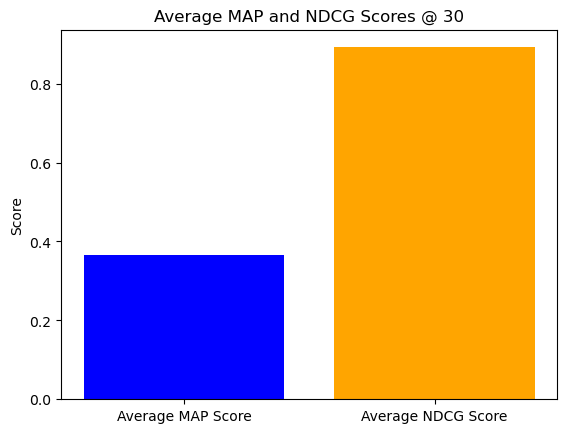

In [9]:
scores = [scores['map'], scores['ndcg']]
labels = ['Average MAP Score', 'Average NDCG Score']

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('Score')
plt.title('Average MAP and NDCG Scores @ 30')
plt.show()


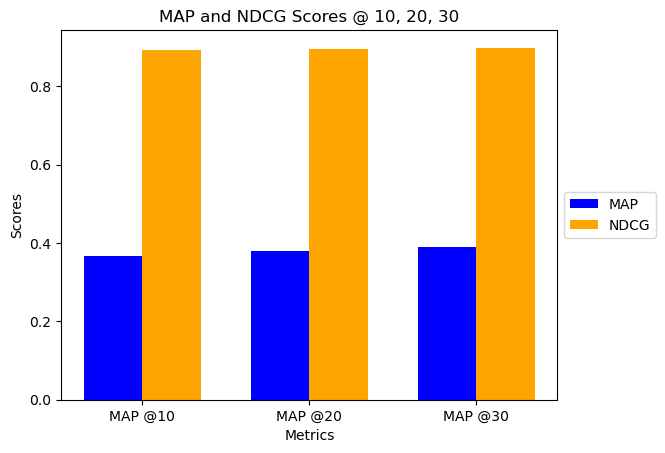

In [12]:
scores = {
    'map': [0.3658, 0.3789, 0.3892],
    'ndcg': [0.8920, 0.8954, 0.8987]
}

labels = ['MAP @10', 'MAP @20', 'MAP @30']
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

bars_map = ax.bar(x - bar_width/2, scores['map'], bar_width, label='MAP', color='blue')
bars_ndcg = ax.bar(x + bar_width/2, scores['ndcg'], bar_width, label='NDCG', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('MAP and NDCG Scores @ 10, 20, 30')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
